# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | First Name | Last Name | Signature | Hours | Contribution |
| Member 3: | First Name | Last Name | Signature | Hours | Contribution |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [2]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
# Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe
cv_set = pd.read_csv('UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
# Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
# Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('2020-03-14-16-45-35.csv')


For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [3]:
# TODO: Display first two rows of cv_set
# (1 mark)

print(cv_set.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [4]:
# TODO: Load the info method of cv_set
# (1 mark)

cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [5]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
# Display the number of rows and columns for each dataset
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")


'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [6]:
# TODO: Display all columns in cv_set
# (1 mark)
print(cv_set.columns)

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [7]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [8]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])

# Display the first two rows of X
print(X.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.023871  0.000003  0.001496   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.024153  0.000006  0.001865   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.000544  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187  
1  0.000615  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144  

[2 rows x 32 columns]


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [10]:
# TODO - Perform test/train split
# (1 mark)

# Perform train/test split, with 30% data for testing and stratify on y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [11]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)

pipe = Pipeline([
    ('scaler', StandardScaler()),  # Scaler step
    ('svc', SVC())                 # Classifier step
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [12]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Scaler options
    'svc__C': [0.01, 0.1, 1, 10, 100],                  # C values for SVC
    'svc__gamma': [0.001, 0.01, 0.1, 1],                 # Gamma values for SVC
    'svc__kernel': ['rbf']                               # Use Radial Basis Function kernel
}


In [13]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [14]:
# TODO: Print the results from the grid search
# (2 marks)

# Printing the results from the grid search
print("Best parameter set:\n{}".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.cv_results_['mean_train_score'][grid.best_index_]))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))

# Evaluating the best model on the test set
test_set_score = grid.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(test_set_score))


Best parameter set:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best cross-validation train score: 0.98
Best cross-validation validation score: 0.95
Test set accuracy: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

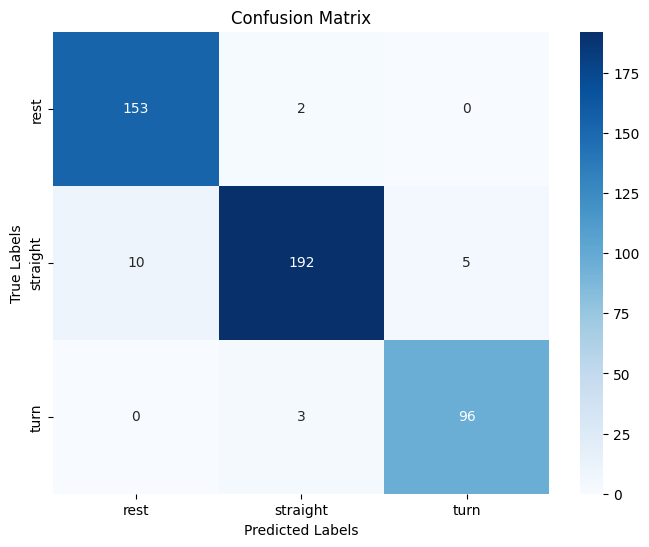

Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



<Figure size 640x480 with 0 Axes>

In [15]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions for the test set
y_pred = grid.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
plt.savefig('Confusion_Matrix_1.2.3.png')

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The fit of the model can be evaluated using several factors:
   

*   **Training and Validation Scores:** If the model has high performance on both the training and validation sets, it indicates a good fit. A large discrepancy between these scores may suggest overfitting (high training score, low validation score) or underfitting (low scores on both).
*   **Test Set Accuracy:** The model's generalization ability is best evaluated by the test set accuracy. A high test accuracy suggests that the model generalizes well to unseen data.

*   **Confusion Matrix and Classification Report:** The confusion matrix shows how well the model's predictions align with the true labels. High precision, recall, and F1-scores in the classification report, across all classes, indicate a well-fit model.


2.  The intervals chosen for C and gamma in the grid search are reasonable for an initial search but may not fully capture the optimal hyperparameters:



*   **C (Regularization Parameter):** The interval [0.01, 0.1, 1, 10, 100] spans a broad range, which is good for exploring different regularization strengths. However, the step size is relatively large, which may miss finer variations in the optimal C value. Using a more refined search (e.g., logarithmic scale with np.logspace) could help explore intermediate values and potentially identify a more optimal setting.
*   **Gamma (Kernel Coefficient):** The range [0.001, 0.01, 0.1, 1] covers different levels of decision boundary curvature. However, it might be too coarse, potentially missing finer adjustments. A more granular search (e.g., testing values like 0.005, 0.05) might yield better results, especially for more complex datasets where precise tuning of gamma is critical.


___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [16]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
# Extract the target vector (motion_state) from test_set1 into y1
y1 = test_set1['motion_state']

# Extract all the features (drop 'motion_state') from test_set1 into X1
X1 = test_set1.drop(columns=['motion_state'])

# Display the first two rows of X1 to verify
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [17]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# Extract the target vector (motion_state) from test_set2 into y2
y2 = test_set2['motion_state']

# Extract all the features (drop 'motion_state') from test_set2 into X2
X2 = test_set2.drop(columns=['motion_state'])

# Display the first two rows of X2 to verify
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [18]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

# Test score for test_set1
test_set1_score = grid.score(X1, y1)
print("test_set1 score: {:.2f}".format(test_set1_score))

# Test score for test_set2
test_set2_score = grid.score(X2, y2)
print("test_set2 score: {:.2f}".format(test_set2_score))


test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

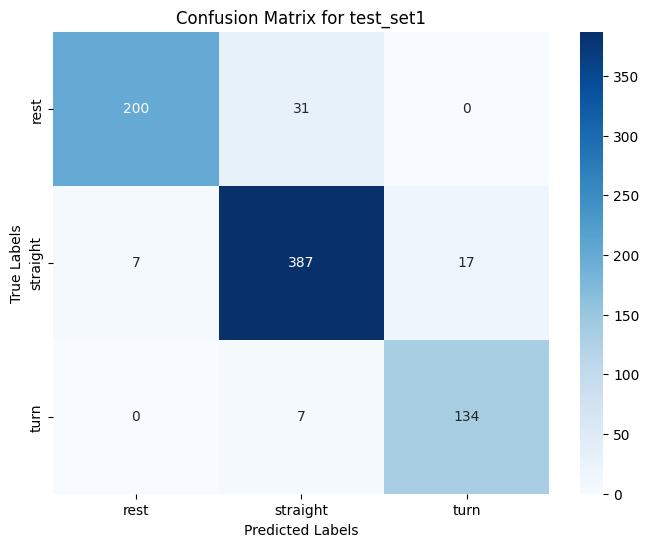

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



<Figure size 640x480 with 0 Axes>

In [19]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)

# Get predictions for test_set1
y1_pred = grid.predict(X1)

# Compute the confusion matrix for test_set1
conf_matrix1 = confusion_matrix(y1, y1_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for test_set1")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
plt.savefig('Confusion_Matrix_1.3.2_test_set1.png')

# Print the classification report for test_set1
print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

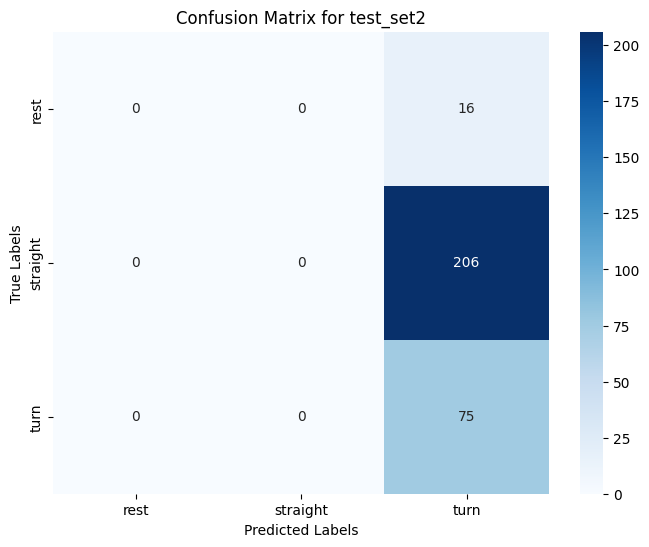

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 640x480 with 0 Axes>

In [20]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Get predictions for test_set2
y2_pred = grid.predict(X2)

# Compute the confusion matrix for test_set2
conf_matrix2 = confusion_matrix(y2, y2_pred)

# Display the confusion matrix as a heatmap for test_set2
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for test_set2")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
plt.savefig('Confusion_Matrix_1.3.2_test_set2.png')

# Print the classification report for test_set2
print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. The model's performance may vary across datasets:


*   **Training/Validation vs Test Datasets (X_test, y_test) vs (X1, y1) and (X2, y2):** If a significant performance drop is observed on the independent test sets (test_set1 and test_set2), it suggests overfitting or data distribution shift. Overfitting happens when the model fits too closely to the training data, losing its ability to generalize. Data distribution shift occurs when the test datasets differ from the training data, leading to lower accuracy.

2. **Potential Causes for Performance Differences:**



1.   **Overfitting:** The model may have memorized the training data, performing poorly on unseen test sets.
2.   **Data Distribution Shift:** The test data might come from a different source or environment, affecting model performance due to changes in data characteristics.
3.   **Hyperparameter Mismatch:** The hyperparameters may be optimized for the training set but are not well-suited for the independent test sets.
4.   **Data Quality Issues:** Differences in noise, preprocessing, or class distribution between the training and test datasets can lead to reduced performance.


___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [38]:
# TODO - Load selected features from cv_set to X
# (1 marks)
# Load selected features from cv_set into X
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]

# Display the first two rows of X
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [39]:
# TODO - Load motion_state column (target vector) into y
# Load the target vector (motion_state column) into y
y = cv_set['motion_state']

# Display the first two rows of y to verify
print(y.head(2))

0    rest
1    rest
Name: motion_state, dtype: object


___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [40]:
# TODO - Perform model training and tuning using `GridSearchCV`

# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 2: Initialize the pipeline with a scaler and the SVC model
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Default scaler
    ('svc', SVC())  # Default SVC classifier
])

# Step 3: Define the parameter grid for GridSearchCV
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Scaler options
    'svc__C': [0.01, 0.1, 1, 10, 100],                   # C values for SVC
    'svc__gamma': [0.001, 0.01, 0.1, 1],                  # Gamma values for SVC
    'svc__kernel': ['rbf']                                # Use Radial Basis Function kernel
}

# Step 4: Set up GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)

# Step 5: Fit the model using the training data
grid.fit(X_train, y_train)

# Step 6: Print the best parameters and scores
print("Best parameters found: ", grid.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))

# Step 7: Evaluate on the test set
test_score = grid.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(test_score))

Best parameters found:  {'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best cross-validation accuracy: 0.82
Test set accuracy: 0.83


___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [41]:
# TODO: Print the results from the grid search

print("Best parameters:\n{}".format(grid.best_params_))

# Best cross-validation train score (the mean score for training data during cross-validation)
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))

# Best cross-validation test score (the best test score across the folds during cross-validation)
best_test_score = max(grid.cv_results_['mean_test_score'])
print("Best cross-validation test score: {:.2f}".format(best_test_score))

# Test set accuracy after fitting the model to the training data and evaluating on the test set
test_set_accuracy = grid.score(X_test, y_test)
print("Test-set score: {:.2f}".format(test_set_accuracy))

Best parameters:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best cross-validation train score: 0.82
Best cross-validation test score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

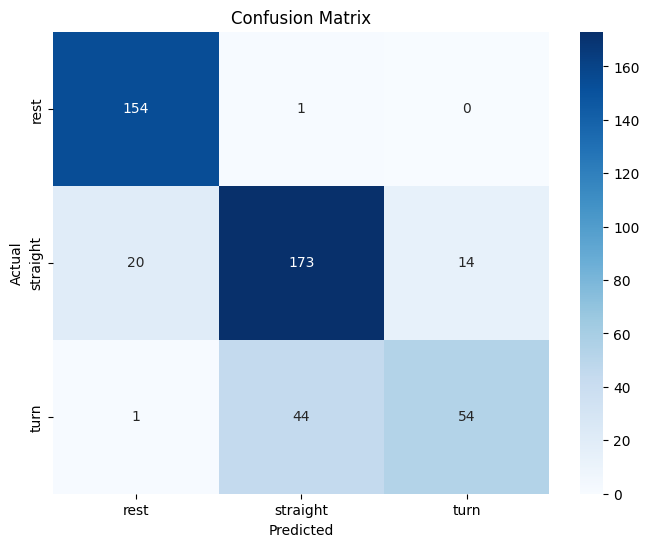

Classification Report:

              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



<Figure size 640x480 with 0 Axes>

In [42]:
# TODO - Display confusion matrix and print classification reports

# Predict on the test set using the best model from grid search
y_pred = grid.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=grid.best_estimator_.classes_, yticklabels=grid.best_estimator_.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
plt.savefig('Confusion_Matrix_2.1.3.png')

# Print the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. Based on the comparison between the training/cross-validation performance of the two models (from Section 1 and Section 2), the model in Section 2 (using selected features) is likely to be a better fit for the following reasons:



1.   **Feature Selection:**


*   In Section 2, the model uses only selected features, which reduces the dimensionality and potential noise in the data. By focusing on the most relevant features (e.g., variance and sums of sensor readings), the model can generalize better.

*   In Section 1, the model uses all available features, which may introduce irrelevant or redundant information, leading to potential overfitting or unnecessary complexity.

2.   **Overfitting Risk:**

*   Section 1 might show higher cross-validation scores because the model has more features to work with, which can lead to overfitting (where the model performs well on training data but struggles to generalize to unseen data).
*   Section 2, with fewer features, is less prone to overfitting. Focusing on a smaller set of relevant features can lead to better generalization on test datasets (e.g., test_set1 and test_set2).



3.   **Performance on Test Datasets:**
*   The performance on independent test datasets (e.g., X_test, X1, and X2) is a stronger indicator of how well the model generalizes. If Section 2's model performs more consistently across these test sets, it suggests that it is a better fit for real-world data, even though it might show slightly lower training scores compared to Section 1.
*   Section 1's model, which might have a higher cross-validation accuracy, could be overfitting to the training data, resulting in poor performance on the test datasets.



4.   **Model Complexity:**

*   The model in Section 2 is less complex, as it uses fewer features, making it more interpretable and efficient. This could also lead to faster training and prediction times, especially for larger datasets.













___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [32]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
# Select the relevant features for model training from test_set1
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']

# Extract the features and target vector from test_set1
X1 = test_set1[selected_features]  # Features
y1 = test_set1['motion_state']     # Target

# Display the first two rows of X1 to verify
print("X1 (first 2 rows):")
X1.head(2)

X1 (first 2 rows):


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [33]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# Extract the features and target vector from test_set2
X2 = test_set2[selected_features]  # Features
y2 = test_set2['motion_state']     # Target

# Display the first two rows of X2 to verify
print("X2 (first 2 rows):")
X2.head(2)

X2 (first 2 rows):


,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [34]:
# TODO - Print test score accuracies for test_set1 and test_set2
# Test set 1 accuracy
test_set1_score = grid.score(X1, y1)  # Use the grid search best model to score test_set1
print("test_set1 score: {:.2f}".format(test_set1_score))

# Test set 2 accuracy
test_set2_score = grid.score(X2, y2)  # Use the grid search best model to score test_set2
print("test_set2 score: {:.2f}".format(test_set2_score))


test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

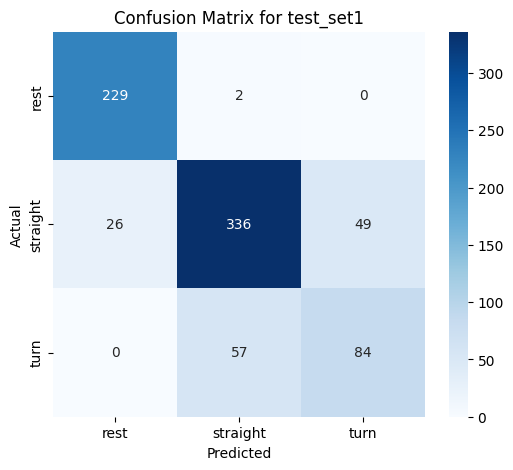

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



<Figure size 640x480 with 0 Axes>

In [35]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

# Predict the labels for test_set1
y1_pred = grid.predict(X1)

# Confusion Matrix
cm = confusion_matrix(y1, y1_pred)

# Display Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for test_set1")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.savefig('Confusion_Matrix_2.2.2_test_set1.png')

# Classification Report
print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

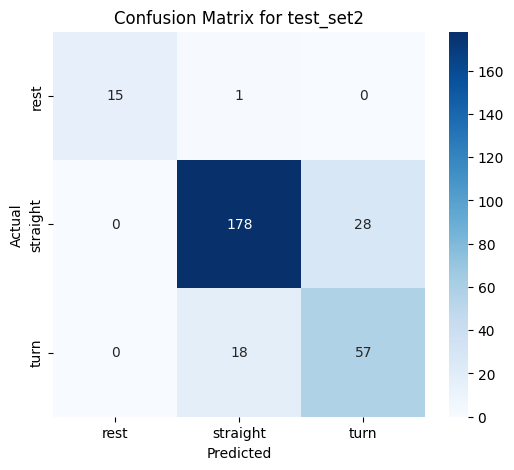

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



<Figure size 640x480 with 0 Axes>

In [37]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Predict the labels for test_set2
y2_pred = grid.predict(X2)

# Confusion Matrix
cm2 = confusion_matrix(y2, y2_pred)

# Display Confusion Matrix for test_set2
plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for test_set2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.savefig('Confusion_Matrix_2.2.2_test_set2.png')

# Classification Report for test_set2
print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. **Comparison of Model Performance on Training/Validation Set (2.1) vs. Test Sets (2.2):**


*   The performance on the training/validation set (as seen in Section 2.1) is expected to be higher because the model has seen this data during training and was tuned to optimize for it using grid search with cross-validation. The accuracy achieved on the training/validation set reflects the model's ability to generalize to the data it has been trained on.

*   The performance on the test sets (i.e., test_set1 and test_set2 in Section 2.2) provides insight into how well the model generalizes to unseen data. Typically, we expect to see a slight drop in performance between the training/validation set and the test sets. If the accuracy on the test sets is significantly lower than on the training set, it could indicate overfitting, where the model is too closely aligned to the training data and struggles to generalize to new, unseen data.
*   The comparison between training/validation accuracy and test set accuracy is important for assessing model fit:


    *   **Good fit:** If the accuracy on the training set is similar to the test set, the model is well-regularized and generalizes well to new data.
    *   **Overfitting:** If the model performs significantly better on the training set compared to the test sets, it may be overfitting, which suggests the model has memorized the training data rather than learning the underlying patterns.
    *   **Underfitting:** If the accuracy on both the training set and the test sets is low, it could indicate underfitting, where the model is too simple to capture the patterns in the data.

2.


*   **Section 1 (Full Feature Set):**
In Section 1, the model uses all available features, leading to better performance on training/validation sets. However, a significant performance drop on test sets could indicate overfitting, where the model is memorizing noise rather than generalizing well.
*   **Section 2 (Selected Features):**
In Section 2, the model uses fewer, more relevant features, reducing complexity. This often results in reduced overfitting. However, if key features are excluded, the model could suffer from underfitting, resulting in lower performance.

**Performance Comparison:**


*   **Section 1:** Good performance on training/validation sets but poor test set performance suggests overfitting.
*   **Section 2:** Consistent performance on both training and test sets indicates better generalization and reduced overfitting. If test performance is lower than Section 1, it could imply the selected features are insufficient for capturing patterns.







____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
1.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
# X_train, X_test, y_train, y_test =

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
# pipe =

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

In [ ]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform train/test split

In [ ]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
# pipe =

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [ ]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.


____